<a href="https://colab.research.google.com/github/Joseline7/TFM-VIU-DeepLearning/blob/main/TFM_Joseline_Aguirre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Clasificación Multiclase de imágenes de ultrasonido de seno usando una red Profunda**

> Bloc con sangría


*-Benigno*
*-Maligno*
*-Normal*

# **Extración de imagenes del DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print("Leyendo imagenes de: ", drive.mount)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Leyendo imagenes de:  <function mount at 0x7fd33f8bde60>


## **INICIO**

# **LIBRERIAS**

In [ ]:
import numpy as np
import os
import re
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#se cambió from keras.utils import to_categorical
from keras.utils import multi_gpu_utils
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import batch_normalization
from keras.layers.advanced_activations import LeakyReLU
#librería para matriz de confusión
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

**Versión**

*   Tensor flow
*   Keras

In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
print(keras.__version__)

2.8.0


Revisión de lectura de número de imagenes a usar

In [ ]:
import pathlib
data_dir = pathlib.Path('/content/drive/MyDrive/TFM/dataset/Dataset_BUSI_with_GT/')
#Imgenes -mask.png
count = len(list(data_dir.glob('*/*_mask.png')))
print("Número de imagenes con máscara:", count)
#Todas las imagenes .png
image_count = len(list(data_dir.glob('*/*.png')))
print("Número de datos tipo imagen:",image_count)

Número de imagenes con máscara: 780
Número de datos tipo imagen: 1578


Revisión general de lista de imagenes y sus clases

In [ ]:
df = list(data_dir.glob('*/*_mask.png'))
df = list(data_dir.glob('*/*.png'))

In [ ]:
df

[PosixPath('/content/drive/MyDrive/TFM/dataset/Dataset_BUSI_with_GT/normal/normal (1)_mask.png'),
 PosixPath('/content/drive/MyDrive/TFM/dataset/Dataset_BUSI_with_GT/normal/normal (1).png'),
 PosixPath('/content/drive/MyDrive/TFM/dataset/Dataset_BUSI_with_GT/normal/normal (100).png'),
 PosixPath('/content/drive/MyDrive/TFM/dataset/Dataset_BUSI_with_GT/normal/normal (101).png'),
 PosixPath('/content/drive/MyDrive/TFM/dataset/Dataset_BUSI_with_GT/normal/normal (10).png'),
 PosixPath('/content/drive/MyDrive/TFM/dataset/Dataset_BUSI_with_GT/normal/normal (10)_mask.png'),
 PosixPath('/content/drive/MyDrive/TFM/dataset/Dataset_BUSI_with_GT/normal/normal (100)_mask.png'),
 PosixPath('/content/drive/MyDrive/TFM/dataset/Dataset_BUSI_with_GT/normal/normal (102).png'),
 PosixPath('/content/drive/MyDrive/TFM/dataset/Dataset_BUSI_with_GT/normal/normal (102)_mask.png'),
 PosixPath('/content/drive/MyDrive/TFM/dataset/Dataset_BUSI_with_GT/normal/normal (105)_mask.png'),
 PosixPath('/content/drive/MyDr

**Etiquetas de Imagenes**

In [ ]:
#images = []
#directories = []
#dircount = []
#prevRoot=''
#cant=0
#leo desde la carpeta

#data_dir = os.path.join(os.getcwd(), "'*/*.png'")
#imgpath = data_dir + os.sep

#print("leyendo imagenes de ",imgpath)

#leo desede conteo de imagenes

#image_count = os.path.join(os.getcwd(), "'*/*.png'")
#imgpath = image_count + os.sep
#print("leyendo imagenes de ",imgpath)

#drive.mount = os.path.join(os.getcwd(), "'*/*.png'")
#imgpath = drive.mount + os.sep
#print("leyendo imagenes de ",imgpath)
#prueba
#for root, data_dir, filenames in os.walk(imgpath):
 #   for filename in filenames:
#        if re.search("\.png)$", filename):
#            cant=cant+1
#            filepath = os.path.join(root, filename)
#            image = plt.imread(filepath)
#            images.append(image)
#            b = "Leyendo..." + str(cant)
#            print (b, end="\r")
#            if prevRoot !=root:
#               print(root, cant)
#                prevRoot=root
#               directories.append(root)
#                dircount.append(cant)
#                cant=0
#dircount.append(cant)

#dircount = dircount[1:]
# dircount[0]=dircount[0]+1
#print('Directorios leidos:',len(directories))
#print("Imagenes en cada directorio", dircount)
#print('suma Total de imagenes en subdirs:',sum(dircount))





# **ENTRENAMIENTO Y VALIDACIÓN**

Del conjunto de datos los parámetros para el cargador serán:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Busqueda de las clases y número de datos que se usarán para entremaniento.

*Conjunto de entrenamiento*

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1578 files belonging to 3 classes.
Using 1421 files for training.


*Conjunto de validación*

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1578 files belonging to 3 classes.
Using 315 files for validation.


 *Conjunto de prueba*

In [ ]:
prueba_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.9,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1578 files belonging to 3 classes.
Using 158 files for training.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['benign', 'malignant', 'normal']


# **DESARROLLO**
La división será: el 70% de las imágenes para entrenamiento, el 20% para validación y un 10% de imagenes para prueba.

Se definen las tres clases con el número de imagenes encontradas y ademas se entrega el número correspondiente al porcentaje de validación.

 *Conjunto de validación*

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
print("")
print("Nombre de cada clase:")
#nombre de cada clase
class_names = train_ds.class_names
print(class_names)

Found 1578 files belonging to 3 classes.
Using 473 files for validation.

Nombre de cada clase:
['benign', 'malignant', 'normal']


Enseñamos las clases con su corresponiente etiqueta.

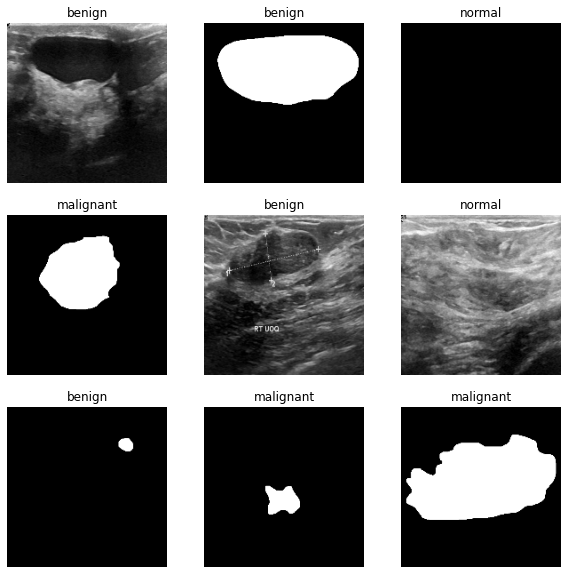

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print("Tensor de forma: ","lote de 32 imágenes de forma 180 x 180 con dimensión RGB",image_batch.shape)
  print("Tensor de forma: ",labels_batch.shape)
  break

Tensor de forma:  lote de 32 imágenes de forma 180 x 180 con dimensión RGB (32, 180, 180, 3)
Tensor de forma:  (32,)


# **Estandarización de los datos**

Se estandarizará los valores para que estén en el rango [0, 1]:

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

Uso de capas.

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print("Rango: ",np.min(first_image),"  a   ", np.max(first_image))

Rango:  0.0   a    1.0


# **Configurar el conjunto de datos para el rendimiento**

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
#mantiene las imágenes en la memoria después de que se cargan fuera del disco durante la primera época
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
#superpone el preprocesamiento de datos y la ejecución del modelo durante el entrenamiento.
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Entrenamiento del modelo

Para completar, se mostrará cómo se entrenó el modelo simplemente utilizando los conjuntos de datos que acabamos de preparar.

El modelo secuencial consta de tres bloques:

-capa de convolución: ( tf.keras.layers.Conv2D ) 

-capa de agrupación máxima: ( tf.keras.layers.MaxPooling2D ) en cada uno de ellos.

Hay una capa totalmente conectada ( tf.keras.layers.Dense ) con 128 unidades encima que se activa mediante una función de activación de ReLU ( 'relu' ). 

Este modelo no se ha ajustado de ninguna manera todavía.

In [ ]:
num_classes = 3

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes),
  #tf.keras.layers.Dense(2, activation ='softmax')
])

Grafica

Para la presición del entrenamiento y la validación de cada época de entrenamiento  se hace uso de:metrics a Model.compile, además de escoger el optimizador tf.keras.optimizers.Adam y la función de pérdida tf.keras.losses.SparseCategoricalCrossentropy. 

Ajuste del modelo antes del entrenamiento

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

Entrenamiento del modelo con 10 epocas.

In [ ]:
train_log = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10, batch_size=128
)

Epoch 1/10
45/45 [==============================] - 195s 2s/step - loss: 0.9035 - accuracy: 0.5813 - val_loss: 0.7323 - val_accuracy: 0.6575
Epoch 2/10
45/45 [==============================] - 54s 1s/step - loss: 0.6841 - accuracy: 0.6953 - val_loss: 0.6266 - val_accuracy: 0.7040
Epoch 3/10
45/45 [==============================] - 53s 1s/step - loss: 0.5451 - accuracy: 0.7474 - val_loss: 0.5528 - val_accuracy: 0.7569
Epoch 4/10
45/45 [==============================] - 54s 1s/step - loss: 0.4730 - accuracy: 0.7847 - val_loss: 0.4533 - val_accuracy: 0.8288
Epoch 5/10
45/45 [==============================] - 52s 1s/step - loss: 0.3534 - accuracy: 0.8480 - val_loss: 0.4448 - val_accuracy: 0.8393
Epoch 6/10
45/45 [==============================] - 54s 1s/step - loss: 0.3107 - accuracy: 0.8797 - val_loss: 0.3919 - val_accuracy: 0.8858
Epoch 7/10
45/45 [==============================] - 52s 1s/step - loss: 0.2697 - accuracy: 0.9015 - val_loss: 0.4368 - val_accuracy: 0.8647
Epoch 8/10
45/45 [=

# **Comprobando la presición del modelo**

In [ ]:
test_loss, test_accuracy = model.evaluate(train_ds, )
print("Exactitud del entrenamiento del modelo: ", test_accuracy*100,"%")

print("")

test_loss, test_accuracy = model.evaluate(val_ds, )
print("Exactitud de la validación del modelo:  ", test_accuracy*100,"%")

45/45 [==============================] - 13s 287ms/step - loss: 0.1336 - accuracy: 0.9564
Exactitud del entrenamiento del modelo:  95.63687443733215 %

15/15 [==============================] - 4s 292ms/step - loss: 0.3653 - accuracy: 0.9070
Exactitud de la validación del modelo:   90.69767594337463 %


Puede notar que la precisión de la validación 75.26% es baja en comparación con la precisión del entrenamiento que es de 99.9%, lo que indica que el modelo se está sobreajustando.

# Grafica con la función de coste

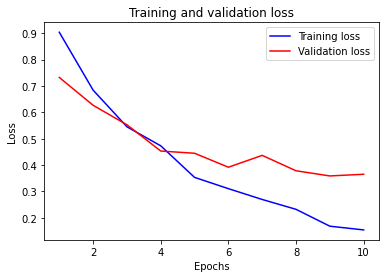

In [ ]:
loss = train_log.history['loss']
val_loss = train_log.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Grafica de la exactitud**

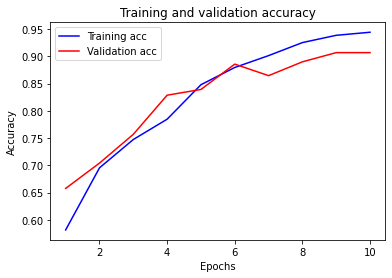

In [ ]:
plt.clf()
acc = train_log.history['accuracy']
val_acc = train_log.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# *Matriz de confusion para primer modelo*

In [ ]:
y_test = [loss, val_loss]
y_pred = [acc, val_acc]

features = y_test
target = y_pred
class_names = train_log
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            random_state=1)
classifier = LogisticRegression()
cm = confusion_matrix(features,target)
target_predicted = classifier.fit(features_train, target_train).predict(features_test)
matrix = confusion_matrix(target_test, features)
print(cm)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


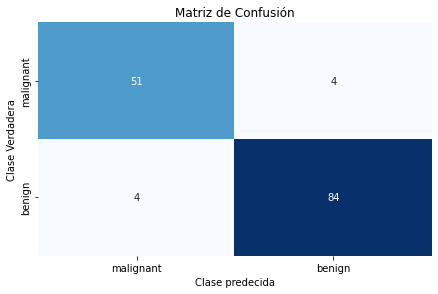

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        55
           1       0.95      0.95      0.95        88

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [ ]:

# Cargar datos
#iris = datasets.load_iris()
iris = datasets.load_breast_cancer()
#iris = train_log()
model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
model.compile(tf.keras.optimizers.SGD(), loss='mse')
# create feature matrix
features = iris.data

# create target vector
target = iris.target

# create list of target class names
class_names = iris.target_names

# split into training and test sets
# Crear conjunto de prueba conjunto de prueba
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)

# crear regresión logística Regresión logística
classifier = LogisticRegression()

# entrenar modelo y hacer predicciones
target_predicted = classifier.fit(features_train, target_train).predict(features_test)

# crear matriz de confusión
matrix = confusion_matrix(target_test, target_predicted)

# crear marco de datos de pandas Crear un conjunto de datos
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# crear mapa de calor dibujar mapa de calor

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Matriz de Confusión"), plt.tight_layout()
plt.ylabel("Clase Verdadera"), plt.xlabel("Clase predecida")
plt.show()
inform = classification_report(target_test, target_predicted)
print(inform)

PRUEBAS

pruebas de entrenamiento correctas

# **Modelo secuencial**
Consta de tres bloques:

  -Convolución ( tf.keras.layers.Conv2D ).

  -Capa de agrupación máxima ( tf.keras.layers.MaxPooling2D ) en cada uno de    
   ellos. 

  -Capa totalmente conectada ( tf.keras.layers.Dense ) con 128 unidades encima 
   que se activa mediante una función de activación de ReLU ( 'relu' ). 


# *LIBRERÍA*

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


# *MODELO*

In [ ]:
num_classes = len(class_names)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# *COMPILACIÓN*

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# *RESUMEN*

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

# *ENTRENAMIENTO DEL MODELO*

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3


InvalidArgumentError: ignored

In [ ]:
test_loss, test_accuracy = model.evaluate(train_ds, )
print("Exactitud del entrenamiento del modelo: ", test_accuracy*100,"%")

print("")

test_loss, test_accuracy = model.evaluate(val_ds, )
print("Exactitud de la validación del modelo:  ", test_accuracy*100,"%")

InvalidArgumentError: ignored

# *VISUALIZACIÓN DE LOS RESULTADOS DEL ENTRENAMIENTO*

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: ignored

CONCLUSIÓN:
Los gráaficos demuestran que la presición del entrenamiento y la presición de validación se encuentran desvidos por un margen grande logrando solo un  73.5 % de presición.

# *Sobreajuste*


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

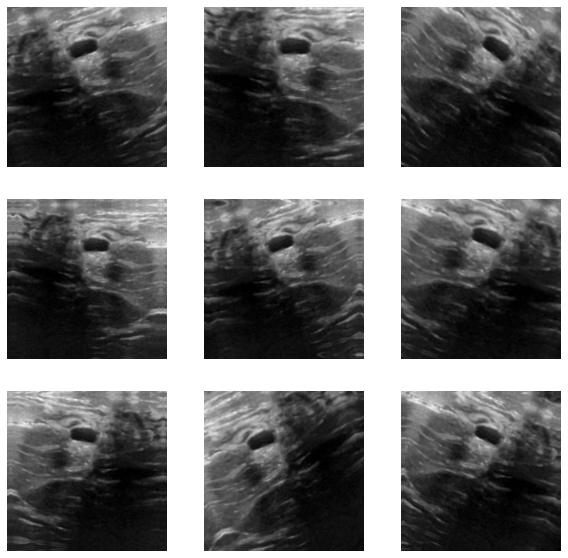

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Aplicación de DROPOUT

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# *COMPILACIÓN DEL MODELO*

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
35/35 [==============================] - 46s 1s/step - loss: 0.9329 - accuracy: 0.5276 - val_loss: 0.9287 - val_accuracy: 0.4757
Epoch 2/15
35/35 [==============================] - 44s 1s/step - loss: 0.7816 - accuracy: 0.6317 - val_loss: 0.7599 - val_accuracy: 0.6638
Epoch 3/15
35/35 [==============================] - 44s 1s/step - loss: 0.7167 - accuracy: 0.6814 - val_loss: 0.7373 - val_accuracy: 0.6469
Epoch 4/15
35/35 [==============================] - 43s 1s/step - loss: 0.6761 - accuracy: 0.6851 - val_loss: 0.7131 - val_accuracy: 0.6617
Epoch 5/15
35/35 [==============================] - 44s 1s/step - loss: 0.6631 - accuracy: 0.6860 - val_loss: 0.7906 - val_accuracy: 0.6300
Epoch 6/15
35/35 [==============================] - 43s 1s/step - loss: 0.6397 - accuracy: 0.7140 - val_loss: 0.6536 - val_accuracy: 0.6913
Epoch 7/15
35/35 [==============================] - 43s 1s/step - loss: 0.6186 - accuracy: 0.7149 - val_loss: 0.7112 - val_accuracy: 0.6744
Epoch 8/15
35/35 [==

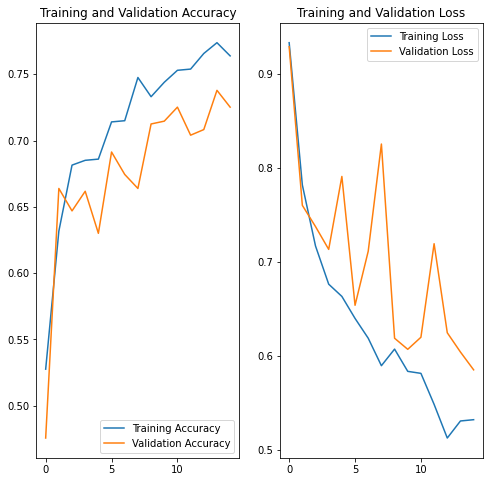

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# *Prueba del modelo con nuevos datos*

In [ ]:
img_url = "https://images.app.goo.gl/WkuJqACx7ajWuWv57"
img_path = tf.keras.utils.get_file('/content/drive/MyDrive/Dataset_BUSI_with_GT/benign/benign (10)_mask.png', origin=img_url)
#img_path = prueba_ds

img = tf.keras.utils.load_img(
    img_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "Esta imagen pertenece a la clase {} con un {:.2f} % de confidencialidad."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Esta imagen pertenece a la clase malignant con un 91.51 % de confidencialidad.


# ***Matriz de confusión***

In [ ]:
imagen = datasets.load_breast_cancer()
features = datasets.data
target = datasets.load_breast_cancer
class_names = datasets.load_breast_cancer

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


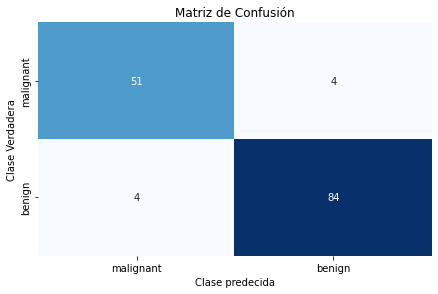

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        55
           1       0.95      0.95      0.95        88

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [ ]:
# Cargar datos
#iris = datasets.load_iris()
iris = datasets.load_breast_cancer()

# create feature matrix
features = iris.data

# create target vector
target = iris.target

# create list of target class names
class_names = iris.target_names

# split into training and test sets
# Crear conjunto de prueba conjunto de prueba
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)

# crear regresión logística Regresión logística
classifier = LogisticRegression()

# entrenar modelo y hacer predicciones
target_predicted = classifier.fit(features_train, target_train).predict(features_test)

# crear matriz de confusión
matrix = confusion_matrix(target_test, target_predicted)

# crear marco de datos de pandas Crear un conjunto de datos
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# crear mapa de calor dibujar mapa de calor

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Matriz de Confusión"), plt.tight_layout()
plt.ylabel("Clase Verdadera"), plt.xlabel("Clase predecida")
plt.show()
inform = classification_report(target_test, target_predicted)
print(inform)

otras pruebas

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = [224, 224,3]),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation ='softmax')
])

In [ ]:
def get_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(1, activation = 'linear', input_dim = 784))
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.1), loss='mean_squared_error', metrics=['mae'])
  return model

In [ ]:
import datetime

class MyCustomCallback(tf.keras.callbacks.Callback):

  def on_train_batch_begin(self, batch, logs=None):
    print('Entrenamiento: batch {} comienza en {}'.format(batch, datetime.datetime.now().time()))

  def on_train_batch_end(self, batch, logs=None):
    print('Entrenamiento: batch {} termina en {}'.format(batch, datetime.datetime.now().time()))

  def on_test_batch_begin(self, batch, logs=None):
    print('Evaluacion: batch {} comienza en {}'.format(batch, datetime.datetime.now().time()))

  def on_test_batch_end(self, batch, logs=None):
    print('Evaluacion: batch {} termina en {}'.format(batch, datetime.datetime.now().time()))

In [ ]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

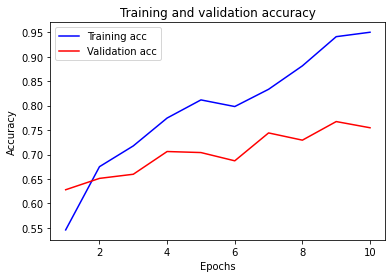

In [ ]:
plt.clf()
acc = train_log.history['accuracy']
val_acc = train_log.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

CNN

In [ ]:
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

In [ ]:
def getProbsAndPreds(someX):
    probs = softmax(np.dot(someX,w))
    preds = np.argmax(probs,axis=1)
    return probs,preds

In [ ]:
train_log = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10, batch_size=128
)

Epoch 1/10
35/35 [==============================] - 28s 794ms/step - loss: 0.0060 - accuracy: 0.9991 - val_loss: 3.0830 - val_accuracy: 0.7505
Epoch 2/10
35/35 [==============================] - 28s 797ms/step - loss: 0.0037 - accuracy: 0.9991 - val_loss: 3.0319 - val_accuracy: 0.7378
Epoch 3/10
35/35 [==============================] - 30s 845ms/step - loss: 0.0062 - accuracy: 0.9991 - val_loss: 3.1546 - val_accuracy: 0.7505
Epoch 4/10
35/35 [==============================] - 28s 794ms/step - loss: 0.0036 - accuracy: 0.9991 - val_loss: 3.0200 - val_accuracy: 0.7336
Epoch 5/10
35/35 [==============================] - 28s 794ms/step - loss: 0.0067 - accuracy: 0.9991 - val_loss: 3.1600 - val_accuracy: 0.7505
Epoch 6/10
35/35 [==============================] - 28s 792ms/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 3.0176 - val_accuracy: 0.7294
Epoch 7/10
35/35 [==============================] - 28s 791ms/step - loss: 0.0068 - accuracy: 0.9991 - val_loss: 3.1384 - val_accuracy: 0.7505

In [ ]:
test_loss, test_accuracy = model.evaluate(train_ds, )
print("Exactitud del entrenamiento del modelo:", test_accuracy*100,"%")
test_loss, test_accuracy = model.evaluate(val_ds, )
print("Exactitud de la vlidación del modelo:", test_accuracy*100,"%")

35/35 [==============================] - 7s 188ms/step - loss: 0.0039 - accuracy: 0.9982
Exactitud del entrenamiento del modelo: 99.81900453567505 %
15/15 [==============================] - 3s 187ms/step - loss: 2.9520 - accuracy: 0.7442
Exactitud de la vlidación del modelo: 74.41860437393188 %


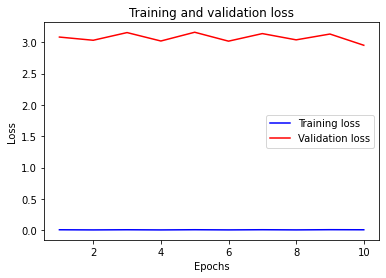

In [ ]:
loss = train_log.history['loss']
val_loss = train_log.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

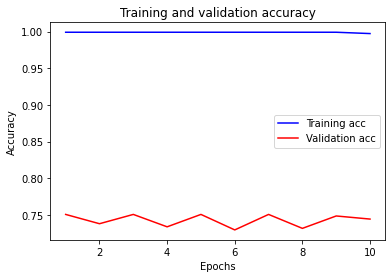

In [ ]:
plt.clf()
acc = train_log.history['accuracy']
val_acc = train_log.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(train_ds)
print("Clase más probable:", np.argmax(predictions[0]) )

Clase más probable: 1


In [ ]:
def softmax(x):
    return np.exp(x) / np.exp.sum(axis=-1, keepdims=True)

# **Uso de tf.data para un control más preciso**

La utilidad de preprocesamiento de Keras anterior, tf.keras.utils.image_dataset_from_directory , es una forma conveniente de crear un tf.data.Dataset a partir de un directorio de imágenes.

Para un control de grano más fino, puede escribir su propia canalización de entrada usando tf.data . Esta sección muestra cómo hacerlo, comenzando con las rutas de archivo del archivo TGZ que descargó anteriormente.

In [ ]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

In [ ]:
for f in list_ds.take(5):
  print(f.numpy())

b'/content/drive/MyDrive/TFM/dataset/Dataset_BUSI_with_GT/malignant/malignant (10)_mask.png'
b'/content/drive/MyDrive/TFM/dataset/Dataset_BUSI_with_GT/benign/benign (148).png'
b'/content/drive/MyDrive/TFM/dataset/Dataset_BUSI_with_GT/benign/benign (303)_mask.png'
b'/content/drive/MyDrive/TFM/dataset/Dataset_BUSI_with_GT/malignant/malignant (127).png'
b'/content/drive/MyDrive/TFM/dataset/Dataset_BUSI_with_GT/benign/benign (94).png'


La estructura de árbol de los archivos se puede utilizar para compilar una lista de nombres de class_names .

In [ ]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)

['benign' 'malignant' 'normal']


Dividiremos el conjunto de datos en conjuntos de entrenamiento y validación:

In [ ]:
val_size = int(image_count * 0.3)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

Puede imprimir la longitud de cada conjunto de datos de la siguiente manera:

In [ ]:
print("Número de datos de entrenamiento:",tf.data.experimental.cardinality(train_ds).numpy())
print("Número de datos de validación:", tf.data.experimental.cardinality(val_ds).numpy())

Número de datos de entrenamiento: 1105
Número de datos de validación: 473


Escriba una función breve que convierta una ruta de archivo en un par (img, label) :

In [ ]:
def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

In [ ]:
def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])

In [ ]:
def process_path(file_path):
  label = get_label(file_path)
  # Load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

Use Dataset.map para crear un conjunto de datos de pares de image, label :

In [ ]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [ ]:
for image, label in train_ds.take(1):
  print("Dimesiones: ", image.numpy().shape)
  print("Etiqueta:   ", label.numpy())

Dimesiones:  (180, 180, 3)
Etiqueta:    1


Configurar el conjunto de datos para el rendimiento
Para entrenar un modelo con este conjunto de datos.

In [ ]:
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

# **Visualiza los datos**

In [ ]:
image_batch, label_batch = next(iter(train_ds))

Puede visualizar este conjunto de datos de la sigueinente manera:

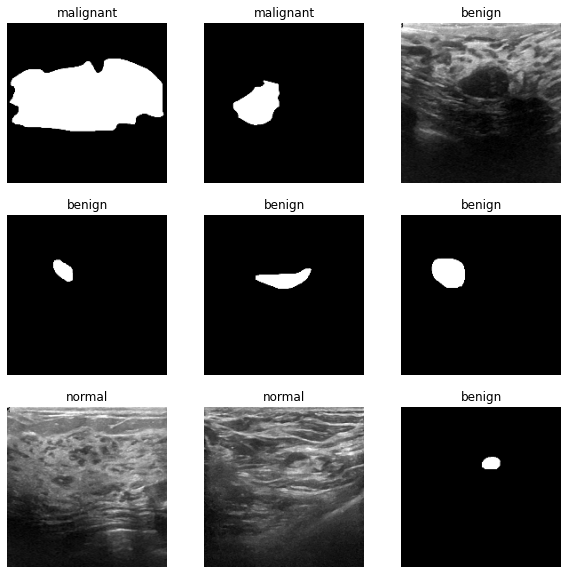

In [ ]:
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

# **Softmax**

Ahora ha creado manualmente un tf.data.Dataset similar al creado por tf.keras.utils.image_dataset_from_directory arriba. Puedes seguir entrenando al modelo con él. Como antes, entrenarás durante unas pocas épocas para que el tiempo de ejecución sea corto.

Aplicando foftmax 

In [ ]:
def softmax(x):
    return np.exp(x) / np.exp.sum(axis=-1, keepdims=True)

In [ ]:
class Perceptron():
  def __init__(self, inputs, outputs):
    self.w = np.random.normal(loc=0.0, 
          scale = np.sqrt(2/(inputs+outputs)), 
          size = (inputs, outputs)) 
    self.ws = []
    self.loss = crossentropy
    self.grad_loss = grad_crossentropy
    
  def __call__(self, w, x):
    return np.dot(x, w) 

  def fit(self, x, y, epochs, lr, verbose=True, log_each=1):
    x = np.c_[np.ones(len(x)), x]
    for epoch in range(1,epochs+1):
        # Batch Gradient Descent
        y_hat = self(self.w, x)  
        # función de pérdida
        l = self.loss(y_hat, y).mean()
        # derivadas
        dldh = self.grad_loss(y_hat, y)
        dhdw = x
        dldw = np.dot(dhdw.T, dldh)
        # actualizar pesos
        self.w = self.w - lr*dldw
        # guardar pesos para animación
        self.ws.append(self.w.copy())
        # print loss
        if verbose and not epoch % log_each:
            print(f"Epoch {epoch}/{epochs} Loss {l}")
            
  def predict(self, x):
    x = np.c_[np.ones(len(x)), x]
    return self(self.w, x)

# **Matriz de confusión**

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(train_ds)
plt.title('Matriz de confusión')
plt.ylabel('Valores reales')
plt.xlabel('Valores previstos')
plt.mostrar()